In [1]:
import sys
from pathlib import Path

# Add project root to sys.path
notebook_dir = Path.cwd()
project_root = notebook_dir.parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

In [23]:
import duckdb
import pandas as pd
import seaborn as sns
from src.utils import get_project_root

In [5]:
PROJECT_ROOT = get_project_root()
RAW_DATA_FOLDER = PROJECT_ROOT / 'data/raw'
DB_RAW_PATH = RAW_DATA_FOLDER / "raw_layer.db"

In [8]:
raw_conn = duckdb.connect(str(DB_RAW_PATH))

In [9]:
commodities_df = raw_conn.sql(f"""
    SELECT * FROM commodities;
""").fetchdf()

In [17]:
yearly_commodities_df = commodities_df.groupby(['commodity', pd.Grouper(key='Date', freq='Y')]).agg({'open': 'first', 'close': 'last'}).reset_index()

/tmp/ipykernel_10774/1288825609.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_commodities_df = commodities_df.groupby(['commodity', pd.Grouper(key='Date', freq='Y')]).agg({'open': 'first', 'close': 'last'}).reset_index()


In [19]:
yearly_commodities_df['pct_change'] = (yearly_commodities_df['close'] - yearly_commodities_df['open'])/yearly_commodities_df['open']

In [21]:
yearly_commodities_df[yearly_commodities_df['commodity'] == 'gold']

,commodity,Date,open,close,pct_change
26,gold,2000-12-31,273.899994,272.000000,-0.006937
27,gold,2001-12-31,268.399994,278.700012,0.038376
28,gold,2002-12-31,278.899994,347.600006,0.246325
29,gold,2003-12-31,346.100006,415.700012,0.201098
30,gold,2004-12-31,415.700012,437.500000,0.052442
31,gold,2005-12-31,431.000000,517.099976,0.199768
32,gold,2006-12-31,518.599976,635.200012,0.224836
33,gold,2007-12-31,635.200012,834.900024,0.314389
34,gold,2008-12-31,848.700012,883.599976,0.041122
35,gold,2009-12-31,881.500000,1095.199951,0.242428


<Axes: xlabel='Date', ylabel='pct_change'>

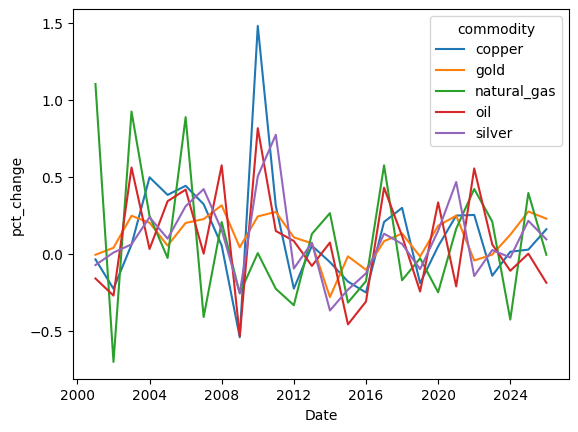

In [24]:
sns.lineplot(yearly_commodities_df, x='Date', y='pct_change', hue='commodity')